In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
data.shape

(1599, 12)

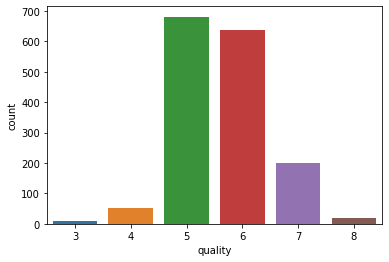

In [9]:
sns.countplot(x='quality',data = data)

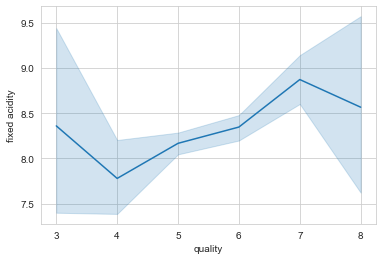

In [10]:
sns.set_style('whitegrid')
sns.lineplot(data = data,x='quality',y='fixed acidity')

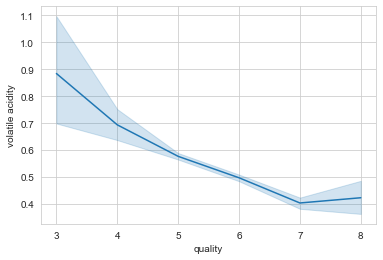

In [11]:
sns.set_style('whitegrid')
sns.lineplot(data = data,x='quality',y='volatile acidity')

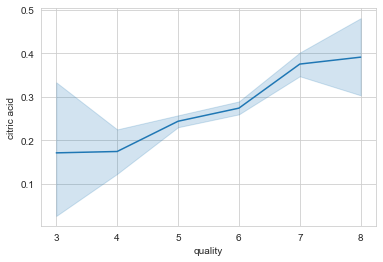

In [12]:
sns.set_style('whitegrid')
sns.lineplot(data = data,x='quality',y='citric acid')

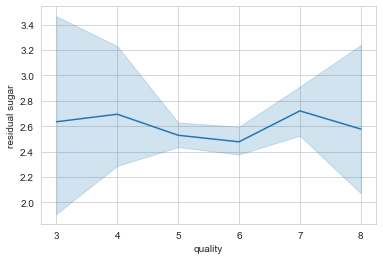

In [13]:
sns.set_style('whitegrid')
sns.lineplot(data = data,x='quality',y='residual sugar')

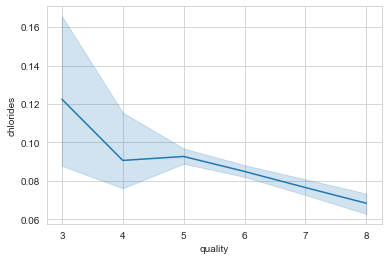

In [14]:
sns.set_style('whitegrid')
sns.lineplot(data = data,x='quality',y='chlorides')

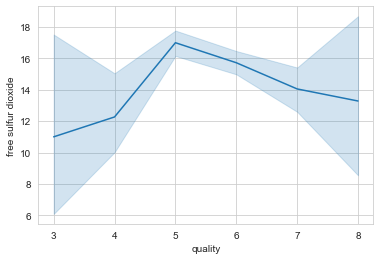

In [15]:
sns.set_style('whitegrid')
sns.lineplot(data = data,x='quality',y='free sulfur dioxide')

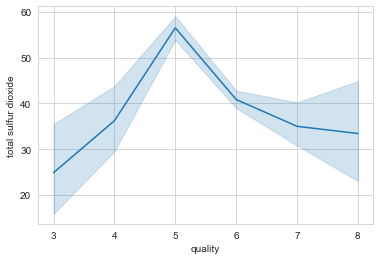

In [16]:
sns.set_style('whitegrid')
sns.lineplot(data = data,x='quality',y='total sulfur dioxide')

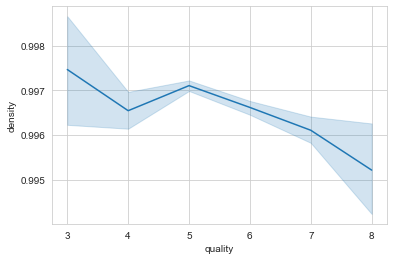

In [17]:
sns.set_style('whitegrid')
sns.lineplot(data = data,x='quality',y='density')

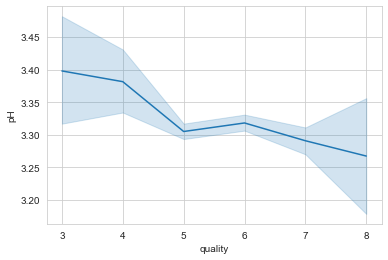

In [18]:
sns.set_style('whitegrid')
sns.lineplot(data = data,x='quality',y='pH')

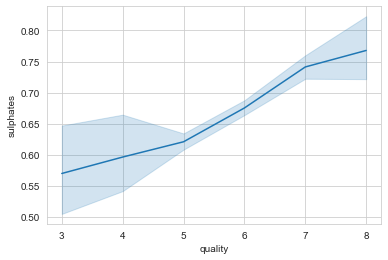

In [19]:
sns.set_style('whitegrid')
sns.lineplot(data = data,x='quality',y='sulphates')

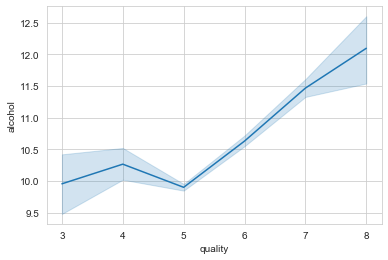

In [20]:
sns.set_style('whitegrid')
sns.lineplot(data = data,x='quality',y='alcohol')

In [21]:
sorted(data['quality'].astype(str).unique())

['3', '4', '5', '6', '7', '8']

In [22]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'],bins = bins,right=True,labels = group_names, retbins=False, precision=3, include_lowest=False, duplicates='raise') 

In [23]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [24]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_quality = LabelEncoder()
data['quality'] = label_quality.fit_transform(data['quality'])

In [25]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

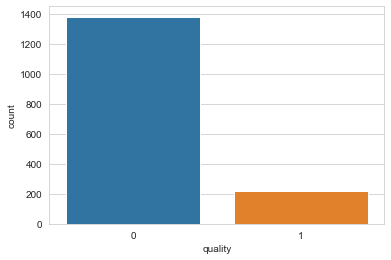

In [26]:
sns.countplot(data['quality'])

In [27]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [28]:
#If below command does not work then command prompt -> pip install keras

In [71]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = os.fit_resample(x, y)

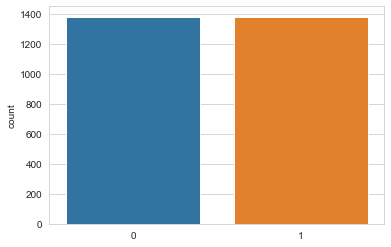

In [72]:
sns.countplot(y_train_res)

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_train_res,y_train_res,test_size = 0.2,random_state = 42)

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [75]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

C:\Users\Rohan anand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[228  63]
 [ 39 223]]
0.8155515370705244



CONFUSION MATRIX


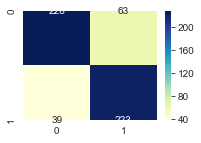

In [78]:
print('\nCONFUSION MATRIX')
plt.figure(figsize= (3,2))
sns.heatmap(cm, annot = True,fmt='d',cmap="YlGnBu")

In [79]:
from sklearn.neighbors import KNeighborsClassifier
classifierknn = KNeighborsClassifier(n_neighbors = 5,metric='minkowski',p=2)
classifierknn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [80]:
y_pred = classifierknn.predict(x_test)

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[225  66]
 [  3 259]]
0.8752260397830018



CONFUSION MATRIX


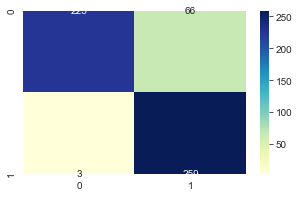

In [82]:
print('\nCONFUSION MATRIX')
plt.figure(figsize= (5,3))
sns.heatmap(cm, annot = True,fmt='d',cmap="YlGnBu")

In [83]:
from sklearn.ensemble import RandomForestClassifier
classifierrf = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
classifierrf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [84]:
y_pred = classifierrf.predict(x_test)

In [85]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[266  25]
 [  0 262]]
0.9547920433996383


In [86]:
from sklearn.svm import SVC
classifiersvm = SVC(kernel = 'linear',random_state=0)
classifiersvm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [87]:
y_pred = classifiersvm.predict(x_test)

In [88]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[226  65]
 [ 39 223]]
0.8119349005424955


In [93]:
from sklearn.tree import DecisionTreeClassifier
classifierdt = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifierdt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [94]:
y_pred = classifierdt.predict(x_test)

In [95]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred)) 

[[258  33]
 [  0 262]]
0.9403254972875226


Highest Accuracy is given by RANDOM FOREST